## Apresentação
Planejamento de tarefas em games envolve representar conhecimento sobre o mundo do jogo e os objetivos do agente de forma estruturada, permitindo que o sistema faça inferências e planeje ações apropriadas. Uma abordagem simples pode envolver a definição de um conjunto de tarefas, recursos, e a relação entre eles, juntamente com um mecanismo básico para o planejamento e execução de tarefas.
>>Neste exemplo, temos uma aplicação básica que representa um robô em um ambiente doméstico com o objetivo de limpar uma sala. Usamos uma estrutura de dados de rede semântica para representar as entidades (por exemplo, o robô, as salas, a sujeira) e as relações entre elas (por exemplo, "está em", "precisa de"). O sistema então usará essa rede para determinar uma sequência de ações para alcançar o objetivo de limpar a sala.


## Instalações

In [2]:
!pip install networkx

## Importações

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

## Implementação da RS

In [8]:
class SemanticNetwork:
    def __init__(self):
        self.entities = {}
        self.relations = []
        self.graph = nx.DiGraph()

    def add_entity(self, name, attributes):
        self.entities[name] = attributes
        self.graph.add_node(name, attributes=attributes)

    def add_relation(self, entity1, relation, entity2):
        self.relations.append((entity1, relation, entity2))
        self.graph.add_edge(entity1, entity2, relation=relation)

    def find_path(self, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        if start not in self.entities:
            return None
        paths = []
        for rel in self.relations:
            if rel[0] == start and rel[2] not in path:
                newpaths = self.find_path(rel[2], end, path)
                if newpaths:
                  for newpath in newpaths:
                      paths.append(newpath)
        return paths

    def plan_task(self, task):
        if task == "clean_room":
            robot_location = [key for key, value in self.entities.items() if "robot" in value][0]
            dirty_rooms = [rel[2] for rel in self.relations if rel[1] == "is_dirty"]
            for room in dirty_rooms:
                path = self.find_path(robot_location, room)
                if path:
                    print(f"Moving robot through {path} to clean {room}.")
                    self.relations = [rel for rel in self.relations if not (rel[1] == "is_dirty" and rel[2] == room)]
                else:
                    print(f"No path to {room}.")
        if task == "Destroy Generator":
          robot_location = [key for key, value in self.entities.items() if "robot" in value][0]
          generator_rooms = [key for key, value in self.entities.items() if "room" and "generator" in value]
          print(robot_location)
          print(generator_rooms)
          for room in generator_rooms:
              path = self.find_path(robot_location, room)
              if path:
                print(f"Assassino se movendo para {path} para destruir o gerador em {room}")
                self.relations = [rel for rel in self.relations if not (rel[1] == "connected_to" and rel[2] == room)]
          
          #Ele encontra o caminho para as salas que possuem geradores 
        elif task == "Find Player":
          robot_location = [key for key, value in self.entities.items() if "robot" in value][0]
          players = [key for key, value in self.entities.items() if "player" in value][0]
          player_rooms = [rel[2] for rel in self.relations if (rel[1] == "is_in" and rel[0] in players)]
         
          for room in player_rooms:
            path = self.find_path(robot_location,room)
            if path:
                print(f"Moving robot through {path} to kill {room}.")
                self.relations = [rel for rel in self.relations if not (rel[1] == "is_dirty" and rel[2] == room)]
            else:
                print(f"No path to {room}.")
            
              
          #Ele vai encontrar o caminho para o jogador
           
          

    def visualize_network(self):
        pos = nx.spring_layout(self.graph)
        labels = {e: self.graph.edges[e]['relation'] for e in self.graph.edges}
        nx.draw(self.graph, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=labels, font_color='red')
        plt.show()


## Aplicação

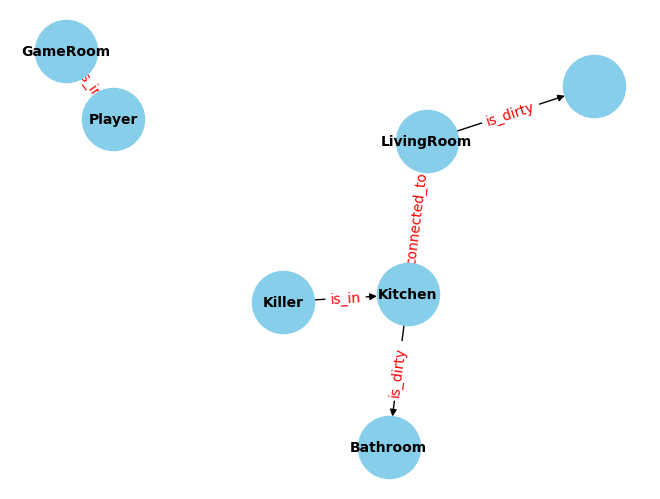

In [9]:
network = SemanticNetwork()
network.add_entity("Kitchen", ["room"])
network.add_entity("LivingRoom", ["room"])
network.add_entity("Bathroom", ["room", "generator"])
network.add_entity("GameRoom", ["room", "generator"])
network.add_entity("João", ["Player"])
network.add_entity("Killer", ["robot"])


network.add_relation("Killer", "is_in", "Kitchen")
network.add_relation("LivingRoom", "connected_to", "")
network.add_relation("Kitchen", "connected_to", "LivingRoom")
network.add_relation("Kitchen","is_dirty", "Bathroom")
network.add_relation("João","is_in","GameRoom")
network.add_relation("Kitchen", "connected_to", "GameRoom")

network.visualize_network()

>>Plan

In [10]:
network.plan_task("Destroy Generator")

['GameRoom']


#Exercícios

1.   Criar um roteiro simplificado para um inimigo que em algum momento do jogo realiza uma campanha que resulte em perdas para jogador
2.   Adaptar o código do robô de limpeza para  atender ao roteiro definido na resposta do item 1




